In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import collections

In [3]:
nations = ['US', 'CA', 'GB']
country = pd.DataFrame()
for nation in nations:
    df = pd.DataFrame()
    filename = f'//Users/mahimakaushiva/Desktop/Youtube/Youtube/countries/{nation}videos.csv'
    df = pd.read_csv(filename)
    videos = collections.Counter(df['title'])
#     total = len(videos)
    codes = nation
    df['trending_days'] = df['title'].map(videos)
    df = df.drop_duplicates(subset='title', keep='last')
    df['region'] = codes
    country = country.append(df)
country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,US
36,Om_zGhJLZ5U,17.14.11,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1,US
41,goP4Z5wyOlM,17.14.11,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1,US
44,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,1,US
46,ogYum4kWXgk,17.14.11,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13T13:00:06.000Z,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,1,US


In [4]:
country.shape

(34397, 18)

In [5]:
# converting trending_date and publish_time to datetime

country['trending_date'] = pd.to_datetime(country['trending_date'],errors='coerce', format='%y.%d.%m')
country['publish_time'] = pd.to_datetime(country['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

country = country[country['trending_date'].notnull()]
country = country[country['publish_time'].notnull()]

country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,US
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1,US
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1,US
44,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,1,US
46,ogYum4kWXgk,2017-11-14,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13 13:00:06,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,1,US


In [6]:
# removing incomplete rows

country = country.dropna(how = 'any', inplace = False, axis = 0)

In [7]:
country.shape

(33282, 18)

In [8]:
category =collections.Counter({2 : 'Autos & Vehicles', 
 1 : 'Film & Animation',
10 : 'Music',
15 : 'Pets & Animals',
17 : 'Sports',
18 : 'Short Movies',
19 : 'Travel & Events',
20 : 'Gaming',
21 : 'Videoblogging',
22 : 'People & Blogs',
23 : 'Comedy',
24 : 'Entertainment',
25 : 'News & Politics',
26 : 'Howto & Style',
27 : 'Education',
28 : 'Science & Technology',
29 : 'Nonprofits & Activism',
30 : 'Movies',
31 : 'Anime/Animation',
32 : 'Action/Adventure',
33 : 'Classics',
34 : 'Comedy',
35 : 'Documentary',
36 : 'Drama',
37 : 'Family',
38 : 'Foreign',
39 : 'Horror',
40 : 'Sci-Fi/Fantasy',
41 : 'Thriller',
42 : 'Shorts',
43 : 'Shows',
44 : 'Trailers'})
category

Counter({2: 'Autos & Vehicles',
         1: 'Film & Animation',
         10: 'Music',
         15: 'Pets & Animals',
         17: 'Sports',
         18: 'Short Movies',
         19: 'Travel & Events',
         20: 'Gaming',
         21: 'Videoblogging',
         22: 'People & Blogs',
         23: 'Comedy',
         24: 'Entertainment',
         25: 'News & Politics',
         26: 'Howto & Style',
         27: 'Education',
         28: 'Science & Technology',
         29: 'Nonprofits & Activism',
         30: 'Movies',
         31: 'Anime/Animation',
         32: 'Action/Adventure',
         33: 'Classics',
         34: 'Comedy',
         35: 'Documentary',
         36: 'Drama',
         37: 'Family',
         38: 'Foreign',
         39: 'Horror',
         40: 'Sci-Fi/Fantasy',
         41: 'Thriller',
         42: 'Shorts',
         43: 'Shows',
         44: 'Trailers'})

In [9]:
country['category']=country['category_id'].map(category)
# country = country.drop(columns = ['category_id'], axis = 1)
country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region,category
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,US,Sports
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1,US,Film & Animation
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1,US,News & Politics
44,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,1,US,People & Blogs
46,ogYum4kWXgk,2017-11-14,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13 13:00:06,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,1,US,Entertainment


In [10]:
# views by category

country['category'].value_counts()

Entertainment            10562
News & Politics           3349
Music                     3275
People & Blogs            3045
Comedy                    2687
Sports                    2492
Howto & Style             2066
Film & Animation          1637
Science & Technology      1062
Gaming                    1044
Education                  883
Pets & Animals             399
Autos & Vehicles           330
Travel & Events            268
Shows                      116
Nonprofits & Activism       66
Movies                       1
Name: category, dtype: int64

In [11]:
country.groupby('category')['views'].value_counts()

category          views   
Autos & Vehicles  2294097     2
                  3154        1
                  3362        1
                  3549        1
                  3802        1
                             ..
Travel & Events   3151902     1
                  3209475     1
                  4169455     1
                  6362355     1
                  23932421    1
Name: views, Length: 32811, dtype: int64

In [12]:
# dropping the movies category as it is too small

movies = country[country.category == 'Movies']
print(movies)

          video_id trending_date  \
39073  l7E0kTvARsA    2018-06-05   

                                                   title channel_title  \
39073  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   

       category_id        publish_time  \
39073           30 2018-05-31 13:30:04   

                                                    tags    views  likes  \
39073  full movie|"full punjabi movie"|"golak"|"bugni...  5661965  67232   

       dislikes  comment_count  \
39073      3784           3851   

                                       thumbnail_link  comments_disabled  \
39073  https://i.ytimg.com/vi/l7E0kTvARsA/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
39073             False                   False   

                                             description  trending_days  \
39073  Rhythm Boyz Entertainment & Hayre Omjee Studio...              6   

      region category  
39073     CA   Movies  


In [13]:
# dropping rows
country.drop([39073], axis=0)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region,category
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,US,Sports
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1,US,Film & Animation
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1,US,News & Politics
44,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,1,US,People & Blogs
46,ogYum4kWXgk,2017-11-14,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13 13:00:06,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,1,US,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,2018-06-14,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09 07:00:01,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,37,GB,Music
38912,IP8k2xkhOdI,2018-06-14,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11 17:09:16,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,35,GB,Music
38913,Il-an3K9pjg,2018-06-14,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08 11:05:08,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...,38,GB,Music
38914,-DRsfNObKIQ,2018-06-14,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08 20:32:32,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,35,GB,Entertainment


In [14]:
# building our df for text preprocessing

country_final = country[['channel_title', 'title', 'tags', 'description', 'category_id', 'category', 'region','trending_days', 'likes', 'dislikes', 'views']]
country_final.head()

,channel_title,title,tags,description,category_id,category,region,trending_days,likes,dislikes,views
10,NFL,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",New England Patriots returner Dion Lewis blast...,17,Sports,US,1,655,25,81377
36,Screen Junkies,TL;DW - Every DCEU Movie Before Justice League,"screenjunkies|""screen junkies""|""sj news""|""hone...",With Justice League approaching fast we rewatc...,1,Film & Animation,US,1,7515,792,288922
41,BBC News,Iraq-Iran earthquake: Deadly tremor hits borde...,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",A strong 7.2-magnitude earthquake has rattled ...,25,News & Politics,US,1,308,26,34785
44,Shawn Johnson East,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...","shawn johnson|""andrew east""|""shawn east""|""shaw...",Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs,US,1,4451,1772,321053
46,People are Awesome,People are Awesome & The Pet Collective presen...,"people are awesome|""people are awesome 2017""|""...",Pets are Awesome! This is for all the animal l...,24,Entertainment,US,1,3417,33,69844


In [15]:
country_final['category'].value_counts()

Entertainment            10562
News & Politics           3349
Music                     3275
People & Blogs            3045
Comedy                    2687
Sports                    2492
Howto & Style             2066
Film & Animation          1637
Science & Technology      1062
Gaming                    1044
Education                  883
Pets & Animals             399
Autos & Vehicles           330
Travel & Events            268
Shows                      116
Nonprofits & Activism       66
Movies                       1
Name: category, dtype: int64

In [16]:
country_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33282 entries, 10 to 38915
Data columns (total 11 columns):
channel_title    33282 non-null object
title            33282 non-null object
tags             33282 non-null object
description      33282 non-null object
category_id      33282 non-null int64
category         33282 non-null object
region           33282 non-null object
trending_days    33282 non-null int64
likes            33282 non-null int64
dislikes         33282 non-null int64
views            33282 non-null int64
dtypes: int64(5), object(6)
memory usage: 4.3+ MB


**EDA**

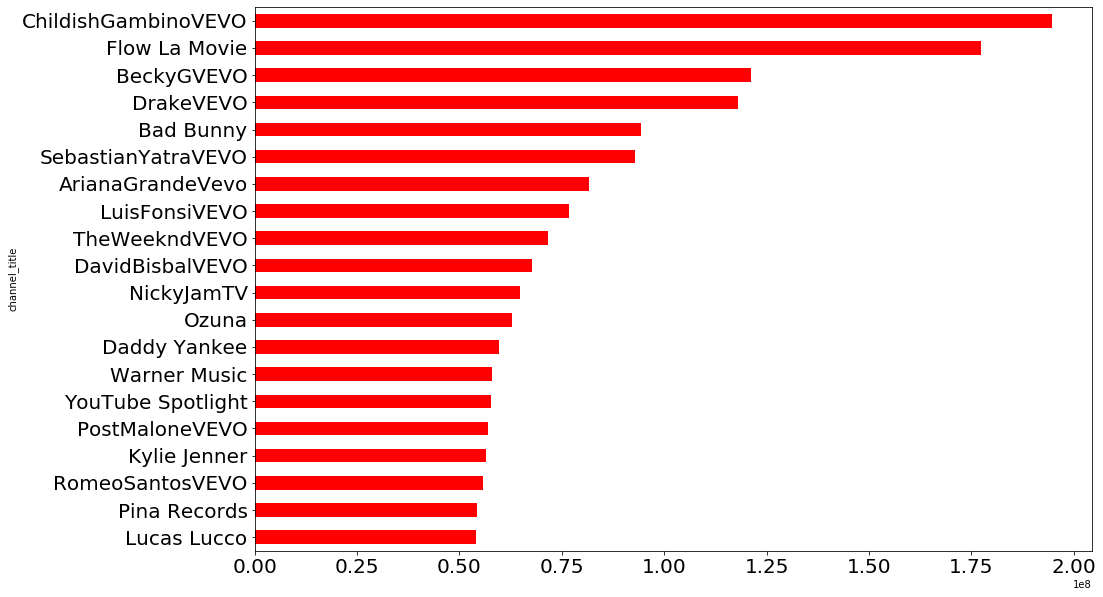

In [17]:
#top 20 channels by mean views

fig = plt.figure(figsize=(15, 10))
country_final.groupby('channel_title').mean().sort_values(by=['views'], ascending=False)[:20].views.sort_values(ascending=True).plot(kind='barh',colormap='autumn',fontsize=20)

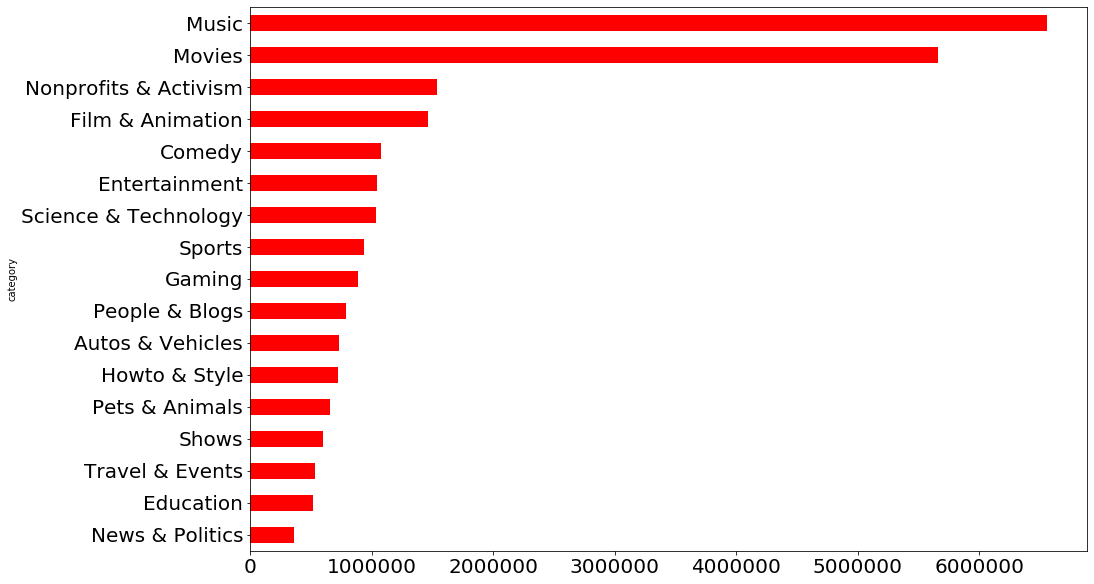

In [18]:
#top 20 categories by mean views

fig = plt.figure(figsize=(15, 10))
country_final.groupby('category').mean().sort_values(by=['views'], ascending=False)[:20].views.sort_values(ascending=True).plot(kind='barh',colormap='autumn',fontsize=20)

In [19]:
# we know these are all top-trending videos but let's see if there is anything we can find out about popularity within these
# popularity here is defined as more than 1.5 IQR

Q1 = country_final.views.quantile(0.25)
Q3 = country_final.views.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

popular_videos=country_final.loc[country_final.views > (Q3 + 1.5 * IQR)]

country_final['popular']=0
country_final.loc[country_final.views > (Q3 + 1.5 * IQR),'popular']=1

country_final['popular'].value_counts()

812172.25


/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0    29432
1     3850
Name: popular, dtype: int64

In [20]:
# we can infer more by taking a ratio of likes and dislikes 

country_final['like_percentage']=(country_final['likes']/(country_final['likes']+country_final['dislikes'])*100)

/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# among popular videos, here are the top 10% of liked videos

country_final.loc[country_final.popular==1].sort_values(by=['like_percentage'], ascending=False)[:10]

,channel_title,title,tags,description,category_id,category,region,trending_days,likes,dislikes,views,popular,like_percentage
38872,Kris Wu,Kris Wu – Like That (Official Music Video),"Kris Wu|""Wu Yi Fan""|""吴亦凡""|""fan shi""|""wuyifan""|...",Special thanks to Stella Maxwell.Get “Like Tha...,10,Music,GB,23,123856,0,13799079,1,100.000000
32215,BANGTANTV,G.C.F in Osaka,"방탄소년단|""BTS""|""BANGTAN""|""HIPHOP""|""랩몬스터""|""RapMons...",BTS Official Homepage http://bts.ibighit.com\n...,10,Music,CA,1,688754,687,2942269,1,99.900354
15525,SMTOWN,JONGHYUN 종현 '우린 봄이 오기 전에 (Before Our Spring)' MV,"JONGHYUN|""종현""|""샤이니""|""SHINee""|""우린 봄이 오기 전에""|""Be...",JONGHYUN's Poet | Artist has been released.\nL...,10,Music,GB,4,364886,434,2364433,1,99.881200
13987,SMTOWN,JONGHYUN 종현 '빛이 나 (Shinin’)' MV,"JONGHYUN|""종현""|""SHINee""|""샤이니""|""빛이 나""|""Shinin'""|...",JONGHYUN's Poet | Artist has been released.\nL...,10,Music,CA,1,827162,1897,4285299,1,99.771186
37457,BANGTANTV,[CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance P...,"방탄소년단|""BTS""|""BANGTAN""|""HIPHOP""|""랩몬스터""|""RapMons...",BTS Official Homepage http://bts.ibighit.comBT...,10,Music,CA,1,845029,1948,4196932,1,99.770006
10562,SMTOWN,[STATION] SMTOWN 'Dear My Family (Live Concert...,"SM STATION|""SMTOWN""|""Dear My Family""|""SM Enter...",SMTOWN's STATION track Dear My Family has been...,10,Music,US,7,381809,963,2997335,1,99.748414
14987,SMTOWN,JONGHYUN 종현 '빛이 나 (Shinin’)' MV,"JONGHYUN|""종현""|""SHINee""|""샤이니""|""빛이 나""|""Shinin'""|...",JONGHYUN's Poet | Artist has been released.\nL...,10,Music,US,6,1021328,2716,7200045,1,99.734777
11563,SMTOWN,[STATION] SMTOWN 'Dear My Family (Live Concert...,"SM STATION|""SMTOWN""|""Dear My Family""|""SM Enter...",SMTOWN's STATION track Dear My Family has been...,10,Music,GB,10,399377,1066,3741415,1,99.733795
15311,SMTOWN,JONGHYUN 종현 '빛이 나 (Shinin’)' MV,"JONGHYUN|""종현""|""SHINee""|""샤이니""|""빛이 나""|""Shinin'""|...",JONGHYUN's Poet | Artist has been released.\nL...,10,Music,GB,5,1040583,2822,7800545,1,99.729539
15538,BANGTANTV,[BANGTAN BOMB] 'MIC Drop' Special Stage (BTS f...,"방탄소년단|""BTS""|""BANGTAN""|""HIPHOP""|""랩몬스터""|""RapMons...",BTS Official Homepage http://bts.ibighit.com\n...,10,Music,US,5,382528,1063,2412639,1,99.722882


In [22]:
#among popular videos, here are top 10% disliked video. 

country_final.loc[country_final.popular==1].sort_values(by=['like_percentage'], ascending=True)[:10]

,channel_title,title,tags,description,category_id,category,region,trending_days,likes,dislikes,views,popular,like_percentage
12573,Bleecker Street,BEIRUT | Official Trailer,"bleecker street|""bleecker street media""|""bleec...",Official Site: http://www.BeirutMovie.com\nLIK...,1,Film & Animation,US,6,510,1774,5186780,1,22.329247
9994,ShadeBlade02,REUPLOAD Logan Paul Vlogs We found a dead bo...,"Logan Paul|""Jake Paul""",just to show how shitty logan paul is.\nEDIT: ...,23,Comedy,CA,1,9382,30072,2299882,1,23.779591
20325,MLG Highlights,Fergie Performs The U.S. National Anthem / 201...,"mlg highlights|""mlg""|""basketball""|""highlights""...",🏀Fergie Performs The U.S. National Anthem / 20...,17,Sports,CA,7,53817,164693,19890243,1,24.629079
20939,MLG Highlights,Fergie Performs The U.S. National Anthem / 201...,"mlg highlights|""mlg""|""basketball""|""highlights""...",🏀Fergie Performs The U.S. National Anthem / 20...,17,Sports,US,7,59281,176903,21005589,1,25.099499
26331,MLG Highlights,Fergie Performs The U.S. National Anthem / 201...,"mlg highlights|""mlg""|""basketball""|""highlights""...",🏀Fergie Performs The U.S. National Anthem / 20...,17,Sports,GB,37,69172,193053,22975455,1,26.378873
19173,ESPN,Fergie's national anthem draws criticism | ESPN,"espn|""espn live""|""fergie""|""national""|""anthem""|...",The Black Eyed Peas singer Fergie provides a u...,17,Sports,US,1,14362,37877,2762839,1,27.492869
17092,Ram Trucks,Official Ram Trucks Super Bowl Commercial | Dr...,"Built To Serve|""Ram Serve""|""Sunday Service""|""M...","In the spirit of Dr. Martin Luther King, Jr., ...",2,Autos & Vehicles,US,4,5503,12290,2294097,1,30.927893
17066,Ram Trucks,Official Ram Trucks Super Bowl Commercial | Dr...,"Built To Serve|""Ram Serve""|""Sunday Service""|""M...","In the spirit of Dr. Martin Luther King, Jr., ...",2,Autos & Vehicles,CA,5,5503,12290,2294097,1,30.927893
19110,Ram Trucks,Official Ram Trucks Super Bowl Commercial | Dr...,"Built To Serve|""Ram Serve""|""Sunday Service""|""M...","In the spirit of Dr. Martin Luther King, Jr., ...",2,Autos & Vehicles,GB,14,5726,12647,2362958,1,31.165297
17773,HyundaiUSA,Hope Detector | Hyundai NFL Super Bowl LII,"Hyundai|""Hyundai Super Bowl""|""Hyundai surprise...",What if metal detectors detected something mor...,2,Autos & Vehicles,US,8,1088,2175,15904385,1,33.343549


**Using NLP for further analysis**

In [23]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

from tqdm import tqdm
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_sm")

# tokenizing the titles of popular videos

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
parser = English()

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens


tqdm.pandas()

normal = country_final["title"][country_final["popular"] == 0].progress_apply(spacy_tokenizer)
popular = country_final["title"][country_final["popular"] == 1].progress_apply(spacy_tokenizer)

/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 3850/3850 [00:00<00:00, 5474.97it/s]


In [24]:
#tokenize words by popularity 

def word_generator(text):
    word = list(text.split())
    return word
def bigram_generator(text):
    bgram = list(nltk.bigrams(text.split()))
    bgram = [' '.join((a, b)) for (a, b) in bgram]
    return bgram
def trigram_generator(text):
    tgram = list(nltk.trigrams(text.split()))
    tgram = [' '.join((a, b, c)) for (a, b, c) in tgram]
    return tgram


normal_words = normal.progress_apply(word_generator)
popular_words = popular.progress_apply(word_generator)
normal_bigrams = normal.progress_apply(bigram_generator)
popular_bigrams = popular.progress_apply(bigram_generator)
normal_trigrams = normal.progress_apply(trigram_generator)
popular_trigrams = popular.progress_apply(trigram_generator)

100%|██████████| 3850/3850 [00:00<00:00, 43227.75it/s]


In [25]:
#creating a word frequency plot

def word_plot(words,my_color):
    slist =[]
    for x in words:
        slist.extend(x)
    fig = plt.figure(figsize=(15, 10))
    pd.Series(slist).value_counts()[:20].sort_values(ascending=True).plot(kind='barh',fontsize=20, color=my_color)
    plt.show()

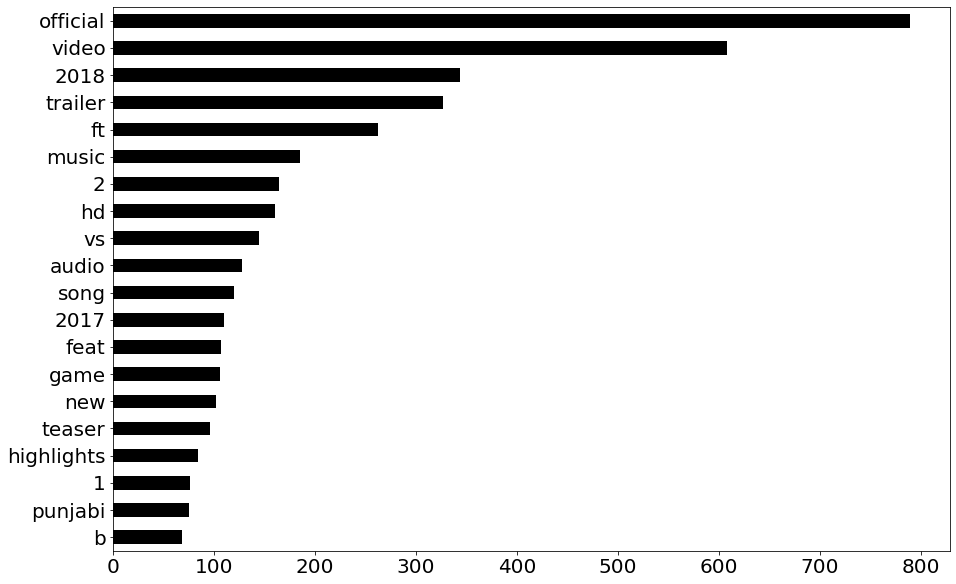

In [26]:
word_plot(popular_words,'black')

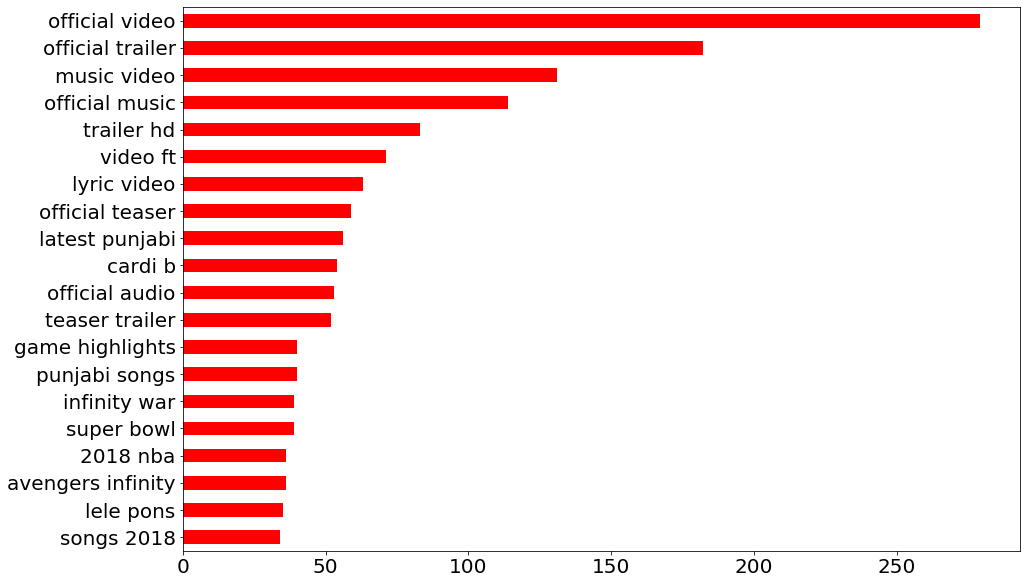

In [64]:
word_plot(popular_bigrams, 'red')

In [61]:
!pip install plotly

In [63]:
# import plotly.express as px
# df = px.data.gapminder()

# fig = px.scatter(country_final.query(x="popular", y="category", size="pop", color="region", log_x=True, size_max=60)
# fig.show()

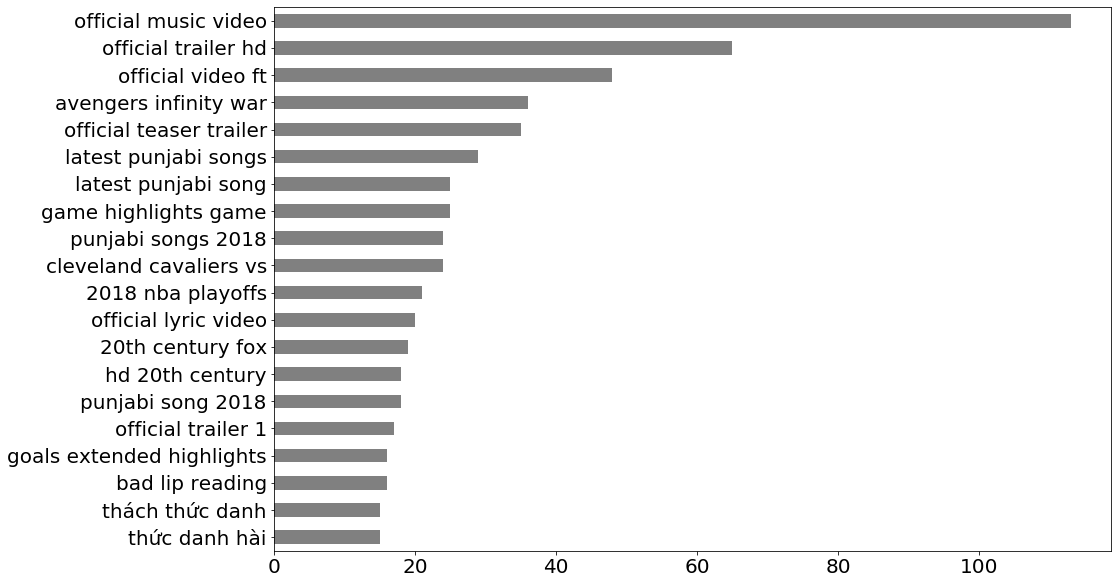

In [27]:
word_plot(popular_trigrams,'grey')

In [27]:
# counting n-grams

import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

word_fd = nltk.FreqDist(country_final['title'])
bigram_fd = nltk.FreqDist(nltk.bigrams(country_final['title']))

bigram_fd.most_common()

[(('Green Day - 2000 Light Years Away',
   'Highlights of the EA predatory behavior announcement'),
  2),
 (('Justice League Could Lose WB Big Money - SJU',
   'Bruno Mars - Live At The Apollo Theater [Official Trailer] (November 29th on CBS)'),
  2),
 (('73 Questions With Michael B. Jordan | Vogue',
   'Prince Harry And Meghan Markle Are Engaged And Royal Wedding Set For Spring | TODAY'),
  2),
 (('Prince Harry And Meghan Markle Are Engaged And Royal Wedding Set For Spring | TODAY',
   "The robot-proof job men aren't taking"),
  2),
 (('2 wingsuit flyers BASE jump into a plane in mid-air. | A Door In The Sky',
   'Old Movies Used To Just Shoot Real Bullets At People'),
  2),
 (('Harry Styles to the Rescue!', 'G-Eazy with Halsey - Him & I'), 2),
 (('Meng Jia & Jackson Wang (孟佳 & 王嘉尔）- MOOD Official Music Video',
   'Charlamagne Tha God & Joe Budden Present: This Year Was Dope/Trash 2017 (Full Episode)'),
  2),
 (('DJ Khaled, Rihanna - Wild Thoughts (2018 Live Performance)',
   'childis

In [44]:
bgm = nltk.collocations.BigramAssocMeasures
finder = nltk.collocations.BigramCollocationFinder.from_words(nltk.corpus.brown.words())
scored = finder.score_ngrams( bgm.likelihood_ratio  )

# Group bigrams by first word in bigram.                                        
prefix_keys = collections.defaultdict(list)
for key, scores in scored:
   prefix_keys[key[0]].append((key[1], scores))

# Sort keyed bigrams by strongest association.                                  
for key in prefix_keys:
   prefix_keys[key].sort(key = lambda x: -x[1])

nltk.collocations.BigramCollocationFinder.from_words(nltk.corpus.brown.words())

In [45]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [46]:
def wcloud(data,bgcolor):
    plt.figure(figsize = (20,15))
    cloud = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    cloud.generate(' '.join(data))
    plt.imshow(cloud)
    plt.axis('off')

In [38]:
# tags_word = country_final[country_final['category']=='Comedy']['tags'].str.lower().str.cat(sep=' ')

# tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
# word_tokens = word_tokenize(tags_word)
# filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
# without_single_chr = [word for word in filtered_sentence if len(word) > 2]
# cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

# wcloud(cleaned_data_title,'white')

In [39]:
# titles_word = country[country_final['category']=='Sports']['title'].str.lower().str.cat(sep=' ')

# titles_word = re.sub('[^A-Za-z]+', ' ', titles_word)
# word_tokens = word_tokenize(titles_word)
# filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
# without_single_chr = [word for word in filtered_sentence if len(word) > 2]
# cleaned_data_titles = [word for word in without_single_chr if not word.isdigit()]

# wcloud(cleaned_data_titles,'white')

In [ ]:
# clearly viewers are looking for original content, across categories - explains the occurence of 'official' across all three ytpes of words

**Latent Dirichlet Allocation by Category**

In [66]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from collections import Mapping
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

entertainment_title= country_final["title"][(country_final['category'] == 'Entertainment')] 
news_politics_title= country_final["title"][(country_final['category'] == 'News & Politics')] 
people_title= country["title"][(country['category'] == 'People & Blogs')] 
music_title= country_final["title"][(country_final['category'] == 'Music')] 
sports_title= country_final["title"][(country_final['category'] == 'Sports')] 
comedy_title= country_final["title"][(country_final['category'] == 'Comedy')] 

In [29]:
vectorizer_entertainment_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, 
                                                 token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
entertainment_title_vectorized = vectorizer_entertainment_title.fit_transform(entertainment_title)
lda_popular_entertainment_title_vectorized = LatentDirichletAllocation(n_components=7, max_iter=5, 
                                                                       learning_method='online',verbose=True)
entertainment_title_vectorized_lda = lda_popular_entertainment_title_vectorized.fit_transform(entertainment_title_vectorized)

pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda_popular_entertainment_title_vectorized,entertainment_title_vectorized, 
                                vectorizer_entertainment_title, mds='tsne')

<>:2: DeprecationWarning: invalid escape sequence \-
<>:2: DeprecationWarning: invalid escape sequence \-
<>:2: DeprecationWarning: invalid escape sequence \-
<ipython-input-29-81c116d29f31>:2: DeprecationWarning: invalid escape sequence \-
  token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [30]:
country_final.title.sample(5)

31708                               PAT - JE SUIS GENTIL 2
5750     BẠN MUỐN HẸN HÒ | Tập 337 UNCUT | Thanh Nhàn -...
31686    Solo: A Star Wars Story | Becoming Solo Featur...
4279     Supergirl 3x09 Sneak Peek Reign (HD) Season 3 ...
7660     Crime Patrol Dial 100 - Ep 671 - Full Episode ...
Name: title, dtype: object

In [49]:
dash

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4     -29.594002  60.112713       1        1  16.684555
0     -45.996586  11.891685       2        1  15.205198
2      20.368856  70.019325       3        1  14.570817
1      53.928768  31.704309       4        1  14.308826
3     -12.437127 -26.423267       5        1  13.703922
6       3.965971  21.797720       6        1  13.230452
5      37.524284 -16.517805       7        1  12.296230, topic_info=     Category         Freq       Term        Total  loglift  logprob
644   Default  1534.000000    episode  1534.000000  30.0000  30.0000
2080  Default   402.000000    trailer   402.000000  29.0000  29.0000
1434  Default   374.000000   official   374.000000  28.0000  28.0000
1791  Default   342.000000     season   342.000000  27.0000  27.0000
586   Default   325.000000      drama   325.000000  26.0000  26.0000
...       ...          ...        ...          ...      ...      ...
460    Topic7    31.496778     critic    32.307980   2.0704  -5.1158
2190   Topic7    31.219357      wants    32.031976   2.0702  -5.1247
1183   Topic7    62.676560       life    80.573500   1.8447  -4.4277
130    Topic7    45.405454  auditions    57.464371   1.8603  -4.7501
1988   Topic7    39.410886       talk    59.916524   1.6770  -4.8917

[264 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2         3  0.975074     aangan
5         7  0.990487        abc
24        2  0.968795       adam
67        5  0.994054    america
68        6  0.989093   american
...     ...       ...        ...
2257      4  0.982051      worst
2264      3  0.984251       wwhl
2269      1  0.989153       year
2280      3  0.986930    youtube
2282      6  0.984184  youtubers

[252 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 2, 4, 7, 6])

In [69]:
vectorizer_news_politics_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, 
                                                 token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
news_politics_title_vectorized = vectorizer_news_politics_title.fit_transform(news_politics_title)
lda_news_politics_title_vectorized = LatentDirichletAllocation(n_components=7, max_iter=5, 
                                                                       learning_method='online',verbose=True)
news_politics_title_vectorized_lda = lda_news_politics_title_vectorized.fit_transform(news_politics_title_vectorized)

pyLDAvis.enable_notebook()
dashshow = pyLDAvis.sklearn.prepare(lda_news_politics_title_vectorized,news_politics_title_vectorized, 
                                vectorizer_news_politics_title, mds='tsne')
dashshow

<>:2: DeprecationWarning:

invalid escape sequence \-

<>:2: DeprecationWarning:

invalid escape sequence \-

<>:2: DeprecationWarning:

invalid escape sequence \-

<ipython-input-69-66afbfc95601>:2: DeprecationWarning:

invalid escape sequence \-



iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3     -29.594002  60.112713       1        1  23.951415
0     -45.996586  11.891685       2        1  15.451606
1      20.368856  70.019325       3        1  14.251014
5      53.928768  31.704309       4        1  12.800480
4     -12.437127 -26.423267       5        1  12.687141
6       3.965971  21.797720       6        1  10.708633
2      37.524284 -16.517805       7        1  10.149711, topic_info=    Category        Freq        Term       Total  loglift  logprob
862  Default  538.000000       trump  538.000000  30.0000  30.0000
493  Default  157.000000        live  157.000000  29.0000  29.0000
585  Default  236.000000        news  236.000000  28.0000  28.0000
570  Default  165.000000       msnbc  165.000000  27.0000  27.0000
860  Default   98.000000     trudeau   98.000000  26.0000  26.0000
..       ...         ...         ...         ...      ...      ...
73    Topic7   11.601166      bannon   12.403997   2.2208  -4.7612
28    Topic7   11.473068  ambassador   12.276348   2.2201  -4.7723
329   Topic7   16.916392    gigantic   20.200218   2.1103  -4.3840
271   Topic7   17.501413   explained   23.333146   2.0001  -4.3500
842   Topic7   13.631311        time   39.745327   1.2176  -4.5999

[283 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         3  0.959389  -december-
2         3  0.944982   -january-
5         4  0.968788   -year-old
6         6  0.951064         abc
12        2  0.921914     actress
...     ...       ...         ...
926       6  0.177859       world
932       2  0.958811        year
937       5  0.405218     youtube
937       6  0.567306     youtube
939       3  0.978724     zardari

[286 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 6, 5, 7, 3])

In [43]:
vectorizer_music_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
music_title_vectorized = vectorizer_music_title.fit_transform(music_title)
lda_music_title_vectorized= LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online',verbose=True)
music_title_vectorized_lda = lda_music_title_vectorized.fit_transform(music_title_vectorized )

pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda_music_title_vectorized, music_title_vectorized, vectorizer_music_title , mds='tsne')
# dash

<>:1: DeprecationWarning: invalid escape sequence \-
<>:1: DeprecationWarning: invalid escape sequence \-
<>:1: DeprecationWarning: invalid escape sequence \-
<ipython-input-43-6cb72f64e785>:1: DeprecationWarning: invalid escape sequence \-
  vectorizer_music_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [44]:
vectorizer_music_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
music_title_vectorized = vectorizer_music_title.fit_transform(music_title)
lda_music_title_vectorized= LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online',verbose=True)
music_title_vectorized_lda = lda_music_title_vectorized.fit_transform(music_title_vectorized )

pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda_music_title_vectorized, music_title_vectorized, vectorizer_music_title , mds='tsne')
# dash

<>:1: DeprecationWarning: invalid escape sequence \-
<>:1: DeprecationWarning: invalid escape sequence \-
<>:1: DeprecationWarning: invalid escape sequence \-
<ipython-input-44-6cb72f64e785>:1: DeprecationWarning: invalid escape sequence \-
  vectorizer_music_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [45]:
vectorizer_people_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
people_title_vectorized = vectorizer_people_title.fit_transform(people_title)
lda_people_title_vectorized= LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online',verbose=True)
people_title_vectorized_lda = lda_people_title_vectorized.fit_transform(people_title_vectorized )

pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda_people_title_vectorized,people_title_vectorized, vectorizer_people_title , mds='tsne')
# dash

<>:1: DeprecationWarning: invalid escape sequence \-
<>:1: DeprecationWarning: invalid escape sequence \-
<>:1: DeprecationWarning: invalid escape sequence \-
<ipython-input-45-7b701225a320>:1: DeprecationWarning: invalid escape sequence \-
  vectorizer_people_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [61]:
vectorizer_comedy_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
comedy_title_vectorized = vectorizer_comedy_title.fit_transform(comedy_title)
lda_comedy_title_vectorized= LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online',verbose=True)
comedy_title_vectorized_lda = lda_comedy_title_vectorized.fit_transform(comedy_title_vectorized )

pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda_comedy_title_vectorized, comedy_title_vectorized, vectorizer_comedy_title , mds='tsne')
dash

<>:1: DeprecationWarning: invalid escape sequence \-
<>:1: DeprecationWarning: invalid escape sequence \-
<>:1: DeprecationWarning: invalid escape sequence \-
<ipython-input-61-fce680acde57>:1: DeprecationWarning: invalid escape sequence \-
  vectorizer_comedy_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1     -29.594002  60.112713       1        1  16.694782
3     -45.996586  11.891685       2        1  15.846528
6      20.368856  70.019325       3        1  14.481868
2      53.928768  31.704309       4        1  14.265043
5     -12.437127 -26.423267       5        1  14.013519
4       3.965971  21.797720       6        1  12.425101
0      37.524284 -16.517805       7        1  12.273159, topic_info=    Category        Freq       Term       Total  loglift  logprob
71   Default  108.000000    comment  108.000000  30.0000  30.0000
488  Default  152.000000      trump  152.000000  29.0000  29.0000
18   Default   95.000000     awards   95.000000  28.0000  28.0000
88   Default   79.000000      daily   79.000000  27.0000  27.0000
265  Default   77.000000       look   77.000000  26.0000  26.0000
..       ...         ...        ...         ...      ...      ...
413   Topic7    9.072146     sarkis    9.858602   2.0146  -4.4896
207   Topic7    9.072113     inanna    9.859178   2.0146  -4.4896
375   Topic7    8.898869        que    9.687597   2.0128  -4.5089
129   Topic7    8.376849  explained    9.167202   2.0076  -4.5693
100   Topic7    8.258424       dead    9.046028   2.0067  -4.5836

[261 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         7  0.930243     actually
3         4  0.763872          aib
3         5  0.190968          aib
5         5  0.918305        album
6         1  0.898276  allegations
...     ...       ...          ...
526       6  0.886560        worst
529       5  0.958311         year
530       3  0.982332         yiay
532       5  0.980439      youtube
533       2  0.922738         zack

[243 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 7, 3, 6, 5, 1])

In [47]:
vectorizer_sports_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
sports_title_vectorized = vectorizer_sports_title.fit_transform(sports_title)
lda_sports_title_vectorized= LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online',verbose=True)
sports_title_vectorized_lda = lda_sports_title_vectorized.fit_transform(sports_title_vectorized )

pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda_sports_title_vectorized, sports_title_vectorized, vectorizer_sports_title , mds='tsne')
# dash

<>:1: DeprecationWarning: invalid escape sequence \-
<>:1: DeprecationWarning: invalid escape sequence \-
<>:1: DeprecationWarning: invalid escape sequence \-
<ipython-input-47-7f294509c144>:1: DeprecationWarning: invalid escape sequence \-
  vectorizer_sports_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [32]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
tokenizer = Tokenizer(nlp.vocab)

# create list of punctuation marks
punctuations = string.punctuation

# create list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# creating our tokenizer function
def spacy_tokenizer(sentence):
    # creating our token object, which is used to create documents with linguistic annotations
    mytokens = parser(sentence)
    
    # lemmatizing each token and converting to lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != '-PRON-' else word.lower_ for word in mytokens ]
    
    # removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations]
    
    # return preprocessed list of tokens
    return mytokens

In [33]:
tfidf_vectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function spacy_tokenizer at 0x1a2ae7a0e0>,
                use_idf=True, vocabulary=None)

In [34]:
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

Using TensorFlow backend.


In [35]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level= False)

In [36]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku

In [106]:
# from sklearn.metrics.pairwise import euclidean_distances

# nlp = spacy.load('en', disable=['parser', 'ner'])

# def similar_documents(text, doc_topic_probs, documents = data, nlp=nlp, top_n=5, verbose=False):
#     topic, x  = predict_topic(text)
#     dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
#     doc_ids = np.argsort(dists)[:top_n]
#     if verbose:        
#         print("Topic KeyWords: ", topic)
#         print("Topic Prob Scores of text: ", np.round(x, 1))
#         print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 1))
#     return doc_ids, np.take(documents, doc_ids)

In [105]:
# # Get similar documents
# mytext = ["Some text about christianity and bible"]
# doc_ids, docs = similar_documents(text=mytext, doc_topic_probs=country_final['category'], documents = data, top_n=1, verbose=True)
# print('\n', docs[0][:500])

**topic modeling using gensim**

In [50]:
# import gensim.corpora as corpora
# from gensim.utils import lemmatize, simple_preprocess

# # tokenize sentences and clean

# def sent_to_words(sentences):
#     for sent in sentences:
#         sent = re.sub('\S*@\S*\s?', '', sent)
#         sent = re.sub('\s+', ' ', sent)
#         sent = re.sub("\'", "", sent)
#         sent = gensim.utils.simple_preprocess(str(sent), deacc=True)
#         yield (sent)
        
# # convert to list
# data = country_final.tags.values.tolist()
# data_words = list(sent_to_words(data)) 
# print(data_words[:1])
 
        

In [51]:
# # build the bigram, trigram models and lemmatize

# # Build the bigram and trigram models
# bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# # !python3 -m spacy download en  # run in terminal once
# def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
#     texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
#     texts = [bigram_mod[doc] for doc in texts]
#     texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
#     texts_out = []
#     nlp = spacy.load('en', disable=['parser', 'ner'])
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     # remove stopwords once more after lemmatization
#     texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
#     return texts_out

# data_ready = process_words(data_words)  # processed Text Data!
# data_ready

In [52]:
# # Build the topic model

# # Create Dictionary
# id2word = corpora.Dictionary(data_ready)

# # Create Corpus: Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in data_ready]

# # Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=4, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=10,
#                                            passes=10,
#                                            alpha='symmetric',
#                                            iterations=100,
#                                            per_word_topics=True)

# print(lda_model.print_topics())

In [53]:
# # Identifying the dominant topic and its percent contribution in each document

# def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
#     # Init output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     for i, row_list in enumerate(ldamodel[corpus]):
#         row = row_list[0] if ldamodel.per_word_topics else row_list            
#         # print(row)
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

#     # Add original text to the end of the output
#     contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     return(sent_topics_df)

# df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# # Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# df_dominant_topic.head(10)

In [54]:
# # The most representative sentence for each topic

# pd.options.display.max_colwidth = 100

# sent_topics_sorteddf_mallet = pd.DataFrame()
# sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

# for i, grp in sent_topics_outdf_grpd:
#     sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
#                                             axis=0)

# # Reset Index    
# sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# # Format
# sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# # Show
# sent_topics_sorteddf_mallet.sample(10)

In [55]:
# # frequency distribution of word count in documents

# doc_lens = [len(d) for d in df_dominant_topic.Text]

# # Plot
# plt.figure(figsize=(16,7), dpi=160)
# plt.hist(doc_lens, bins = 500, color='navy')
# plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
# plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
# plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
# plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
# plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

# plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
# plt.tick_params(size=16)
# plt.xticks(np.linspace(0,100,9))
# plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
# plt.show()


In [56]:
# import seaborn as sns
# import matplotlib.colors as mcolors
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# fig, axes = plt.subplots(2,2,figsize=(12,8), dpi=160, sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):    
#     df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
#     doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
#     ax.hist(doc_lens, bins = 100, color=cols[i])
#     ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
#     sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
#     ax.set(xlim=(0, 100), xlabel='Document Word Count')
#     ax.set_ylabel('Number of Documents', color=cols[i])
#     ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

# fig.tight_layout()
# fig.subplots_adjust(top=0.90)
# plt.xticks(np.linspace(0,100,9))
# fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
# plt.show()


In [57]:
# # 1. Wordcloud of Top N words in each topic
# from matplotlib import pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.colors as mcolors

# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# cloud = WordCloud(stopwords=stop_words,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=10,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0)

# topics = lda_model.show_topics(formatted=False)

# fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):
#     fig.add_subplot(ax)
#     topic_words = dict(topics[i][1])
#     cloud.generate_from_frequencies(topic_words, max_font_size=300)
#     plt.gca().imshow(cloud)
#     plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
#     plt.gca().axis('off')


# plt.subplots_adjust(wspace=0, hspace=0)
# plt.axis('off')
# plt.margins(x=0, y=0)
# plt.tight_layout()
# plt.show()

In [58]:
# # word counts of topic keywords

# from collections import Counter
# topics = lda_model.show_topics(formatted=False)
# data_flat = [w for w_list in data_ready for w in w_list]
# counter = Counter(data_flat)

# out = []
# for i, topic in topics:
#     for word, weight in topic:
#         out.append([word, i , weight, counter[word]])

# df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# # Plot Word Count and Weights of Topic Keywords
# fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
# for i, ax in enumerate(axes.flatten()):
#     ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
#     ax_twin = ax.twinx()
#     ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
#     ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.050); ax.set_ylim(0, 10000)
#     ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
#     ax.tick_params(axis='y', left=False)
#     ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
#     ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

# fig.tight_layout(w_pad=2)    
# fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
# plt.show()

In [59]:
# # sentence chart coloured by topic

# # Sentence Coloring of N Sentences
# from matplotlib.patches import Rectangle

# def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
#     corp = corpus[start:end]
#     mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

#     fig, axes = plt.subplots(end-start, 1, figsize=(30, (end-start)*0.95), dpi=160)       
#     axes[0].axis('off')
#     for i, ax in enumerate(axes):
#         if i > 0:
#             corp_cur = corp[i-1] 
#             topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
#             word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
#             ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
#                     fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

#             # Draw Rectange
#             topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
#             ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
#                                    color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

#             word_pos = 0.06
#             for j, (word, topics) in enumerate(word_dominanttopic):
#                 if j < 14:
#                     ax.text(word_pos, 0.5, word,
#                             horizontalalignment='left',
#                             verticalalignment='center',
#                             fontsize=16, color=mycolors[topics],
#                             transform=ax.transAxes, fontweight=700)
#                     word_pos += .009 * len(word)  # to move the word for the next iter
#                     ax.axis('off')
#             ax.text(word_pos, 0.5, '. . .',
#                     horizontalalignment='left',
#                     verticalalignment='center',
#                     fontsize=16, color='black',
#                     transform=ax.transAxes)       

#     plt.subplots_adjust(wspace=0, hspace=0)
#     plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
#     plt.tight_layout()
#     plt.show()

# sentences_chart()  

In [60]:
# # most discussed topics in the documents

# # Sentence Coloring of N Sentences
# def topics_per_document(model, corpus, start=0, end=1):
#     corpus_sel = corpus[start:end]
#     dominant_topics = []
#     topic_percentages = []
#     for i, corp in enumerate(corpus_sel):
#         topic_percs, wordid_topics, wordid_phivalues = model[corp]
#         dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
#         dominant_topics.append((i, dominant_topic))
#         topic_percentages.append(topic_percs)
#     return(dominant_topics, topic_percentages)

# dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# # Distribution of Dominant Topics in Each Document
# df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
# dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
# df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# # Total Topic Distribution by actual weight
# topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
# df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# # Top 3 Keywords for each Topic
# topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
#                                  for j, (topic, wt) in enumerate(topics) if j < 3]

# df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
# df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
# df_top3words.reset_index(level=0,inplace=True)

In [61]:
# # two plots

# # 1. Number of documents for each topic found by assigning the document to the topic that has the most weight in the document
# # 2. Number of documents for each topic by summing up the actual weight contribution of each topic to respective documents

# from matplotlib.ticker import FuncFormatter

# # Plot
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# # Topic Distribution by Dominant Topics
# ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
# ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
# tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
# ax1.xaxis.set_major_formatter(tick_formatter)
# ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
# ax1.set_ylabel('Number of Documents')
# ax1.set_ylim(0, 1000)

# # Topic Distribution by Topic Weights
# ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
# ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
# ax2.xaxis.set_major_formatter(tick_formatter)
# ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

# plt.show()


In [63]:
# from gensim.models.coherencemodel import CoherenceModel

# # using perplexity and coherence to assess how good the model is


# # # Compute Coherence Score
# # coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=id2word, coherence='c_v')
# # coherence_lda = coherence_model_lda.get_coherence()
# # print('\nCoherence Score: ', coherence_lda)

# # Compute Perplexity - # a measure of how good the model is. lower the better.
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))   

In [79]:
# this indicates it is a good model

In [62]:
# # visualising using PyLDAvis

# import pyLDAvis.gensim
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
# vis

In [64]:
# # show the cluster of documents using a t-SNE cluster chart

# # Get topic weights and dominant topics ------------
# from sklearn.manifold import TSNE
# from bokeh.plotting import figure, output_file, show
# from bokeh.models import Label
# from bokeh.io import output_notebook

# # Get topic weights
# topic_weights = []
# for i, row_list in enumerate(lda_model[corpus]):
#     topic_weights.append([w for i, w in row_list[0]])

# # Array of topic weights    
# arr = pd.DataFrame(topic_weights).fillna(0).values

# # Keep the well separated points (optional)
# arr = arr[np.amax(arr, axis=1) > 0.35]

# # Dominant topic number in each doc
# topic_num = np.argmax(arr, axis=1)

# # tSNE Dimension Reduction
# tsne_model = TSNE(n_components=2, verbose=1, perplexity = 50, n_iter = 5000, random_state=0, angle=.99, init='pca')
# tsne_lda = tsne_model.fit_transform(arr)

# # Plot the Topic Clusters using Bokeh
# output_notebook()
# n_topics = 4
# mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
# plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
#               plot_width=900, plot_height=700)
# plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
# show(plot)

**topic modelling of titles using gensim**

In [119]:
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess

# tokenize sentences and clean

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)
        sent = re.sub('\s+', ' ', sent)
        sent = re.sub("\'", "", sent)
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True)
        yield (sent)
        
# convert to list
data = country_final.title.values.tolist()
data_words = list(sent_to_words(data)) 
print(data_words[:1])

<>:8: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \s
<>:8: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \s
<>:8: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \s
<ipython-input-119-afa2662f9bba>:8: DeprecationWarning: invalid escape sequence \S
  sent = re.sub('\S*@\S*\s?', '', sent)
<ipython-input-119-afa2662f9bba>:9: DeprecationWarning: invalid escape sequence \s
  sent = re.sub('\s+', ' ', sent)


[['dion', 'lewis', 'yd', 'kick', 'return', 'td', 'vs', 'denver', 'cant', 'miss', 'play', 'nfl', 'wk', 'highlights']]


In [120]:
# build the bigram, trigram models and lemmatize

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!
data_ready

[['miss', 'play'],
 [],
 ['earthquake', 'deadly', 'tremor', 'hit', 'border', 'region'],
 ['boyfriend', 'net', 'worth'],
 ['people', 'awesome', 'collective', 'present', 'pet', 'awesome'],
 ['wow'],
 ['face', 'transplant', 'patient', 'meet', 'donor', 'family'],
 ['love', 'sight'],
 ['kid', 'use', 'celeb', 'connection'],
 ['vertical', 'video'],
 [],
 ['meryl_streep', 'meet', 'vogue'],
 ['country', 'music', 'edition'],
 ['thrill', 'review'],
 ['key'],
 ['live'],
 ['lyric', 'video'],
 ['meal', 'cost'],
 ['dark', 'official'],
 ['great', 'view'],
 ['drop', 'catch', 'paper', 'airplane', 'foot'],
 ['improvising',
  'style',
  'different',
  'classical',
  'composer',
  'practice',
  'note'],
 ['walk', 'water', 'official', 'music', 'video'],
 ['kiwi'],
 [],
 ['lover', 'live', 'ellen_degenere'],
 ['pick', 'girlfriend', 'outfit', 'blindfold'],
 ['college', 'oxford'],
 ['diminutive'],
 ['upset', 'uninvited'],
 ['chapter', 'baby'],
 [],
 ['genasis', 'talk', 'come', 'open', 'son', 'autism'],
 ['enter

In [121]:
# Build the topic model

# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.073*"audio" + 0.026*"talk" + 0.026*"ft" + 0.022*"good" + 0.012*"performance" + 0.010*"song" + 0.010*"night" + 0.009*"watch" + 0.009*"come" + 0.009*"cat"'), (1, '0.027*"story" + 0.025*"new" + 0.020*"season" + 0.018*"scene" + 0.015*"perform" + 0.015*"reveal" + 0.015*"interview" + 0.014*"win" + 0.013*"time" + 0.012*"year"'), (2, '0.116*"trailer" + 0.038*"love" + 0.018*"want" + 0.013*"kid" + 0.012*"need" + 0.011*"kiss" + 0.011*"blood" + 0.011*"break" + 0.010*"girl" + 0.008*"explain"'), (3, '0.204*"official" + 0.156*"video" + 0.041*"music" + 0.028*"live" + 0.020*"movie" + 0.019*"lyric" + 0.016*"teaser" + 0.015*"eurovision" + 0.015*"final" + 0.010*"cover"')]


In [122]:
# Identifying the dominant topic and its percent contribution in each document

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.4480,"story, new, season, scene, perform, reveal, interview, win, time, year","[miss, play]"
1,1,0.0,0.2500,"audio, talk, ft, good, performance, song, night, watch, come, cat",[]
2,2,1.0,0.8792,"story, new, season, scene, perform, reveal, interview, win, time, year","[earthquake, deadly, tremor, hit, border, region]"
3,3,2.0,0.8040,"trailer, love, want, kid, need, kiss, blood, break, girl, explain","[boyfriend, net, worth]"
4,4,2.0,0.4429,"trailer, love, want, kid, need, kiss, blood, break, girl, explain","[people, awesome, collective, present, pet, awesome]"
5,5,0.0,0.6249,"audio, talk, ft, good, performance, song, night, watch, come, cat",[wow]
6,6,2.0,0.7472,"trailer, love, want, kid, need, kiss, blood, break, girl, explain","[face, transplant, patient, meet, donor, family]"
7,7,2.0,0.7259,"trailer, love, want, kid, need, kiss, blood, break, girl, explain","[love, sight]"
8,8,2.0,0.8301,"trailer, love, want, kid, need, kiss, blood, break, girl, explain","[kid, use, celeb, connection]"
9,9,3.0,0.4183,"official, video, music, live, movie, lyric, teaser, eurovision, final, cover","[vertical, video]"


In [123]:
# The most representative sentence for each topic

pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9103,"audio, talk, ft, good, performance, song, night, watch, come, cat","[les_plus, belle, musique, de_noel, compilation, de, belle, chanson, de_noel]"
1,1.0,0.9213,"story, new, season, scene, perform, reveal, interview, win, time, year","[find, ancient, macbook, pro, search, shallow, river, interesting, find, unbelievable]"
2,2.0,0.9211,"trailer, love, want, kid, need, kiss, blood, break, girl, explain","[hawaiis, volcano, eruption, intensify, fissure, merge, form, massive, lava, river]"
3,3.0,0.8929,"official, video, music, live, movie, lyric, teaser, eurovision, final, cover","[way, life, remix, official, music, video]"


In [65]:
# get the top 15 keywords for each topic

# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

NameError: name 'vectorizer' is not defined

In [49]:
# # frequency distribution of word count in documents

# doc_lens = [len(d) for d in df_dominant_topic.Text]

# # Plot
# plt.figure(figsize=(16,7), dpi=160)
# plt.hist(doc_lens, bins = 100, color='navy')
# plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
# plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
# plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
# plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
# plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

# plt.gca().set(xlim=(0, 500), ylabel='Number of Documents', xlabel='Document Word Count')
# plt.tick_params(size=16)
# plt.xticks(np.linspace(0,500,9))
# plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
# plt.show()

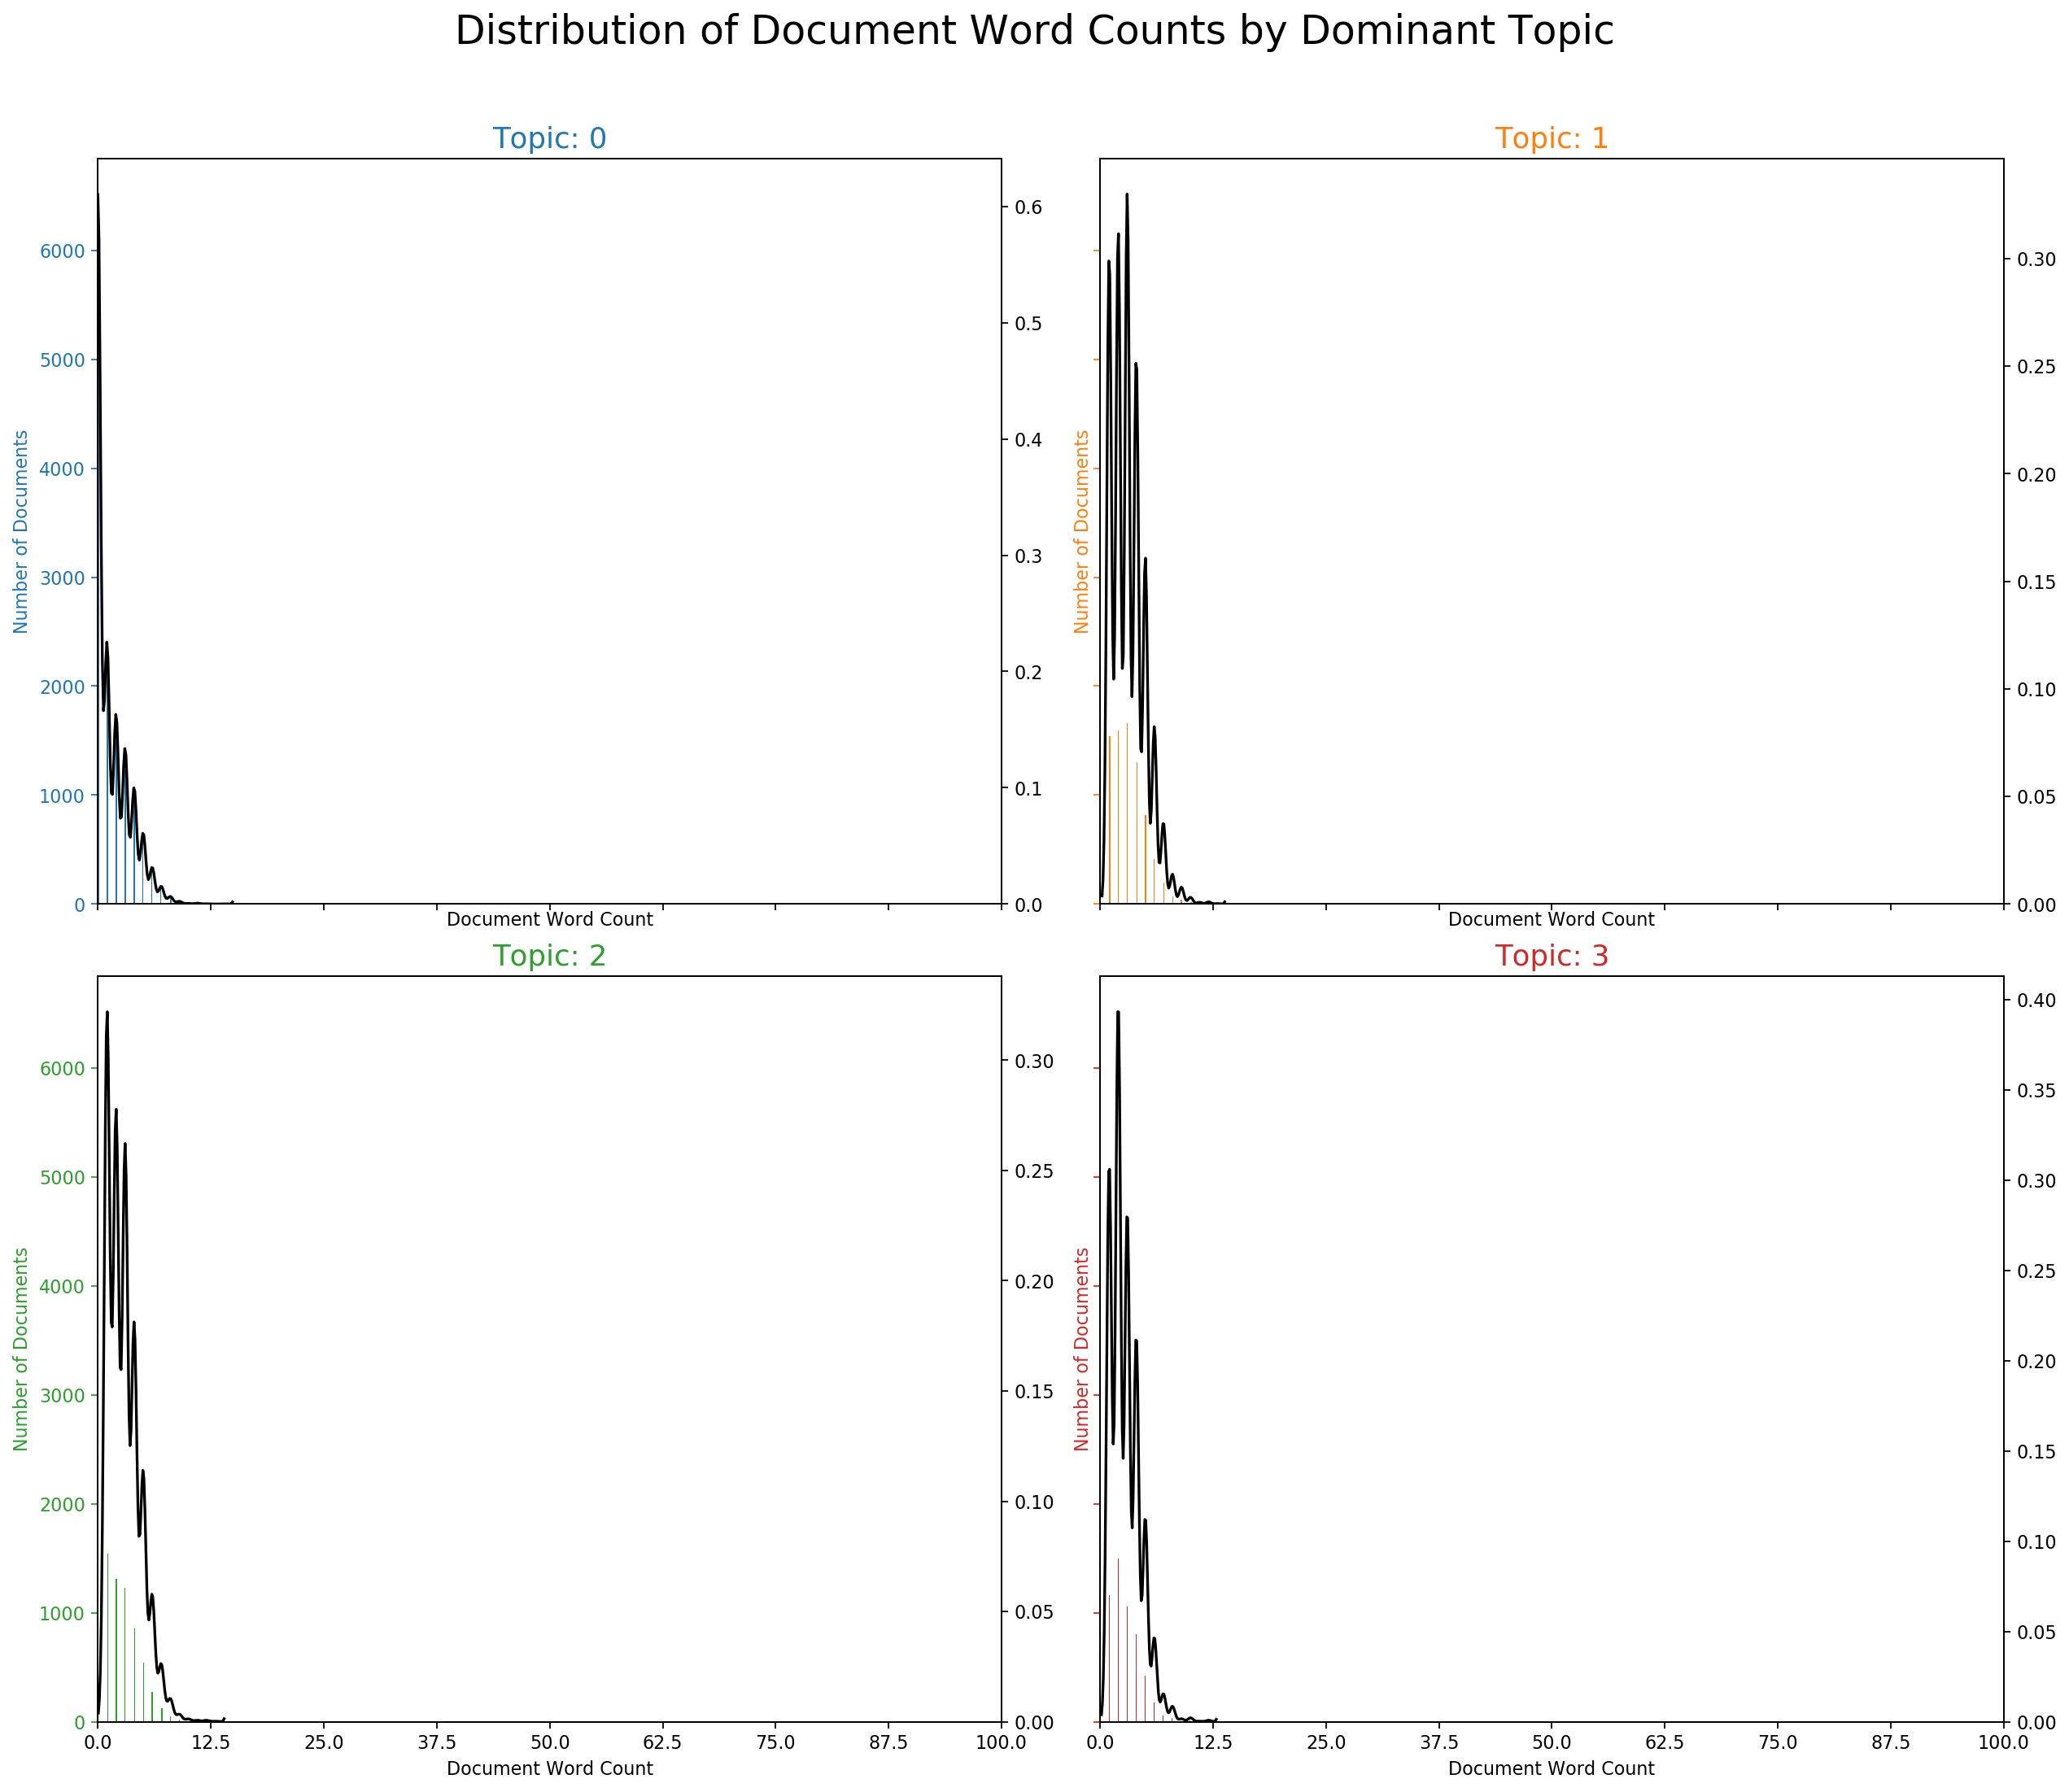

In [126]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 100), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

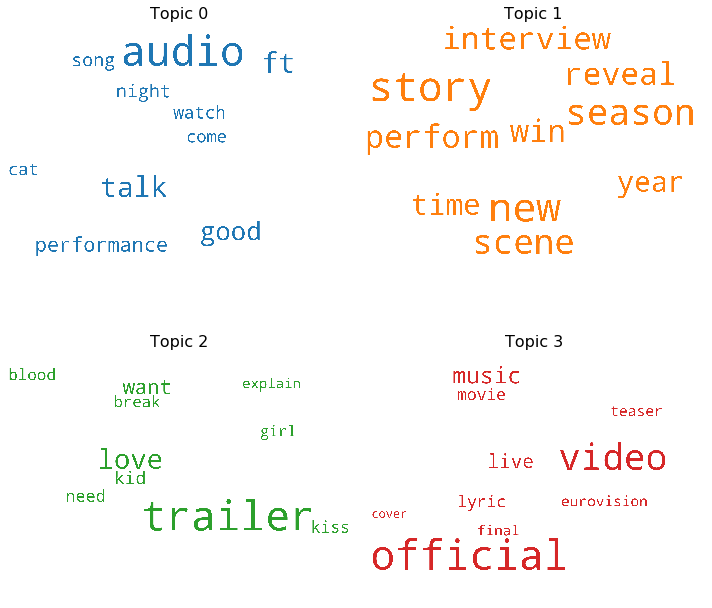

In [127]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [48]:
# # word counts of topic keywords

# from collections import Counter
# topics = lda_model.show_topics(formatted=False)
# data_flat = [w for w_list in data_ready for w in w_list]
# counter = Counter(data_flat)

# out = []
# for i, topic in topics:
#     for word, weight in topic:
#         out.append([word, i , weight, counter[word]])

# df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# # Plot Word Count and Weights of Topic Keywords
# fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
# for i, ax in enumerate(axes.flatten()):
#     ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
#     ax_twin = ax.twinx()
#     ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
#     ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.050); ax.set_ylim(0, 10000)
#     ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
#     ax.tick_params(axis='y', left=False)
#     ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
#     ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

# fig.tight_layout(w_pad=2)    
# fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
# plt.show()

In [47]:
# sentence chart coloured by topic

# # Sentence Coloring of N Sentences
# from matplotlib.patches import Rectangle

# def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
#     corp = corpus[start:end]
#     mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

#     fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
#     axes[0].axis('off')
#     for i, ax in enumerate(axes):
#         if i > 0:
#             corp_cur = corp[i-1] 
#             topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
#             word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
#             ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
#                     fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

#             # Draw Rectange
#             topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
#             ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
#                                    color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

#             word_pos = 0.06
#             for j, (word, topics) in enumerate(word_dominanttopic):
#                 if j < 14:
#                     ax.text(word_pos, 0.5, word,
#                             horizontalalignment='left',
#                             verticalalignment='center',
#                             fontsize=16, color=mycolors[topics],
#                             transform=ax.transAxes, fontweight=700)
#                     word_pos += .009 * len(word)  # to move the word for the next iter
#                     ax.axis('off')
#             ax.text(word_pos, 0.5, '. . .',
#                     horizontalalignment='left',
#                     verticalalignment='center',
#                     fontsize=16, color='black',
#                     transform=ax.transAxes)       

#     plt.subplots_adjust(wspace=0, hspace=0)
#     plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
#     plt.tight_layout()
#     plt.show()

# sentences_chart()

In [46]:
# # most discussed topics in the documents

# # Sentence Coloring of N Sentences
# def topics_per_document(model, corpus, start=0, end=1):
#     corpus_sel = corpus[start:end]
#     dominant_topics = []
#     topic_percentages = []
#     for i, corp in enumerate(corpus_sel):
#         topic_percs, wordid_topics, wordid_phivalues = model[corp]
#         dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
#         dominant_topics.append((i, dominant_topic))
#         topic_percentages.append(topic_percs)
#     return(dominant_topics, topic_percentages)

# dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# # Distribution of Dominant Topics in Each Document
# df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
# dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
# df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# # Total Topic Distribution by actual weight
# topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
# df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# # Top 3 Keywords for each Topic
# topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
#                                  for j, (topic, wt) in enumerate(topics) if j < 3]

# df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
# df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
# df_top3words.reset_index(level=0,inplace=True)

In [44]:
# # two plots

# # 1. Number of documents for each topic found by assigning the document to the topic that has the most weight in the document
# # 2. Number of documents for each topic by summing up the actual weight contribution of each topic to respective documents

# from matplotlib.ticker import FuncFormatter

# # Plot
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# # Topic Distribution by Dominant Topics
# ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
# ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
# tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
# ax1.xaxis.set_major_formatter(tick_formatter)
# ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
# ax1.set_ylabel('Number of Documents')
# ax1.set_ylim(0, 1000)

# # Topic Distribution by Topic Weights
# ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
# ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
# ax2.xaxis.set_major_formatter(tick_formatter)
# ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

# plt.show()

In [45]:
# # Compute Perplexity - # a measure of how good the model is. lower the better.
# print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

In [133]:
# visualising using PyLDAvis

import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.110474 -0.115182       1        1  27.644447
0     -0.127762 -0.191748       2        1  26.374508
2     -0.121410  0.306844       3        1  23.786257
3      0.359646  0.000086       4        1  22.194790, topic_info=     Category         Freq            Term        Total  loglift  logprob
44    Default  3526.000000        official  3526.000000  30.0000  30.0000
30    Default  2691.000000           video  2691.000000  29.0000  29.0000
99    Default  2152.000000         trailer  2152.000000  28.0000  28.0000
86    Default  1495.000000           audio  1495.000000  27.0000  27.0000
35    Default   714.000000           music   714.000000  26.0000  26.0000
...       ...          ...             ...          ...      ...      ...
340    Topic4    57.417686           black    58.257690   1.4908  -5.7056
4679   Topic4    55.315426  wshh_exclusive    56.144836   1.4904  -5.7429
1924   Topic4    56.260292          update    57.104321   1.4904  -5.7259
766    Topic4    91.267227              pt    92.817146   1.4885  -5.2421
733    Topic4    57.188538           remix    58.102032   1.4895  -5.7095

[165 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
2128      4  0.987867          animal
620       4  0.994242          answer
338       3  0.989283             ask
86        2  0.999729           audio
73        2  0.996801            baby
...     ...       ...             ...
486       3  0.997712            want
276       2  0.997119           watch
168       1  0.997067             win
4679      4  0.979609  wshh_exclusive
320       1  0.998899            year

[149 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [ ]:
# show the cluster of documents using a t-SNE cluster chart

# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, perplexity = 50, n_iter = 5000, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

**Generating titles using LSTM**

In [37]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
   
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(popular)
inp_sequences[:10]

[[159, 160],
 [159, 160, 409],
 [159, 160, 409, 832],
 [159, 160, 409, 832, 2],
 [159, 160, 409, 832, 2, 5],
 [159, 160, 409, 832, 2, 5, 590],
 [159, 160, 409, 832, 2, 5, 590, 991],
 [368, 992],
 [368, 992, 2215],
 [3472, 187]]

In [38]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [39]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))
    
    

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 10)            64740     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6474)              653874    
Total params: 763,014
Trainable params: 763,014
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(predictors, label, epochs=50, verbose=5)

/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [41]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [43]:
print (generate_text("Trump", 5, model, max_sequence_len))
print (generate_text("official", 5, model, max_sequence_len))
print (generate_text("super bowl", 4, model, max_sequence_len))
print (generate_text("Fergie", 4, model, max_sequence_len))
print (generate_text("Avengers", 4, model, max_sequence_len))
print (generate_text("Brexit", 4, model, max_sequence_len))

Trump Destroyed Comedian Michelle Wolf 2018
Official Video Attention Pentatonix Con Fi
Super Bowl Bros Trailer Analysis 2018
Fergie Performs U S National
Avengers Infinity War Loki Dead
Brexit Drew 2018 Official Teaser


**LSTM - Predicting the category**

In [70]:
country_final['category'].value_counts().sort_values(ascending= False)

Entertainment            10562
News & Politics           3349
Music                     3275
People & Blogs            3045
Comedy                    2687
Sports                    2492
Howto & Style             2066
Film & Animation          1637
Science & Technology      1062
Gaming                    1044
Education                  883
Pets & Animals             399
Autos & Vehicles           330
Travel & Events            268
Shows                      116
Nonprofits & Activism       66
Movies                       1
Name: category, dtype: int64

In [71]:
# cleaning the text

from nltk.corpus import stopwords

country_final = country_final.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
country_final['title'] = country_final['title'].apply(clean_text)
country_final['title'] = country_final['title'].str.replace('\d+', '')

<>:6: DeprecationWarning:

invalid escape sequence \[

<>:24: DeprecationWarning:

invalid escape sequence \d

<>:6: DeprecationWarning:

invalid escape sequence \[

<>:24: DeprecationWarning:

invalid escape sequence \d

<>:6: DeprecationWarning:

invalid escape sequence \[

<>:24: DeprecationWarning:

invalid escape sequence \d

<ipython-input-71-d20d96f252c1>:6: DeprecationWarning:

invalid escape sequence \[

<ipython-input-71-d20d96f252c1>:24: DeprecationWarning:

invalid escape sequence \d



In [ ]:
print(country_final['title'].sample(5))

In [72]:
# LSTM modeling

#Vectorization by converting each text into a sequence of integers or a vector
#We want results from the top 50000 words
#Set the maximum number of words in each title to 7

# keras module for building LSTM 
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku


# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000

# Max number of words in each title
MAX_SEQUENCE_LENGTH = 7

EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(country_final['title'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

<>:23: DeprecationWarning:

invalid escape sequence \]

<>:23: DeprecationWarning:

invalid escape sequence \]

<>:23: DeprecationWarning:

invalid escape sequence \]

<ipython-input-72-0ec17af96302>:23: DeprecationWarning:

invalid escape sequence \]

Using TensorFlow backend.


Found 25719 unique tokens.


In [73]:
# truncate and pad the input sequence so they are all in the same length for modeling

X = tokenizer.texts_to_sequences(country_final['title'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (33282, 7)


In [74]:
# converting categorical labels to numbers

Y = pd.get_dummies(country_final['category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (33282, 17)


In [75]:
# Train-test-split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(26625, 7) (26625, 17)
(6657, 7) (6657, 17)


In [76]:
batch_size = len(X)
batch_size

33282

In [77]:
# first layer is the embedded layer that uses 100 length vectors to represent each word
# spatialdropout1d performs variational dropout
# the next layer is the LSTM layer with 100 memory units
# output layer must contain 16 output values, one for each class
# activation function is softmax for multi-class classification
# categorical_crossentropy is used as the loss function

from keras.layers.core import Dense, SpatialDropout1D
from keras.layers import Flatten
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(17, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 21300 samples, validate on 5325 samples
Epoch 1/5
21300/21300 [==============================] - 23s 1ms/step - loss: 1.9415 - accuracy: 0.4125 - val_loss: 1.5063 - val_accuracy: 0.5474
Epoch 2/5
21300/21300 [==============================] - 23s 1ms/step - loss: 1.2185 - accuracy: 0.6310 - val_loss: 1.2413 - val_accuracy: 0.6246
Epoch 3/5
21300/21300 [==============================] - 23s 1ms/step - loss: 0.7781 - accuracy: 0.7701 - val_loss: 1.2208 - val_accuracy: 0.6543
Epoch 4/5
21300/21300 [==============================] - 23s 1ms/step - loss: 0.5130 - accuracy: 0.8484 - val_loss: 1.2816 - val_accuracy: 0.6556
Epoch 5/5
21300/21300 [==============================] - 22s 1ms/step - loss: 0.3734 - accuracy: 0.8859 - val_loss: 1.3660 - val_accuracy: 0.6567


In [78]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

6657/6657 [==============================] - 1s 80us/step
Test set
  Loss: 1.402
  Accuracy: 0.652


In [ ]:
# # using the cohen score to assess how much better or worse the classifier is than what would be expected by random chance

# from sklearn.metrics import cohen_kappa_score
# cohen_score = cohen_kappa_score(Y_test, predictions)

In [ ]:
# from sklearn.metrics import precision_recall_fscore_support as score

# precision, recall, fscore, support = score(y_test_labels, predictions)

# print('precision: {}'.format(precision))
# print('recall: {}'.format(recall))
# print('fscore: {}'.format(fscore))
# print('support: {}'.format(support))

In [ ]:
# from sklearn.metrics import confusion_matrix
# import numpy as np


# cm = confusion_matrix(y_test_labels, predictions)
# recall = np.diag(cm) / np.sum(cm, axis = 1)
# precision = np.diag(cm) / np.sum(cm, axis = 0)

# print(recall)

# print(precision)

In [83]:
# #Let us try some sampling technique to remove class imbalance
# from imblearn.over_sampling import SMOTE
# #Over-sampling: SMOTE
# #SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
# #based on those that already exist. It works randomly picking a point from the minority class and computing 
# #the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
# #We'll use ratio='minority' to resample the minority class.
# smote = SMOTE('minority')

# X_sm, Y_sm = smote.fit_sample(X_train, Y_train)
# print(X_sm.shape, Y_sm.shape)

In [82]:
# from sklearn.utils import class_weight
# class_weight = class_weight.compute_class_weight('balanced' ,np.unique(y_train_labels) ,y_train_labels)
# num_epochs =10
# batch_size = 128
# history = model.fit(X_sm, y_sm,
#                     batch_size=batch_size,
#                     epochs=num_epochs,
#                     verbose=2,
#                     class_weight=class_weight,
#                     validation_split=0.2)

In [81]:
# score, acc = model.evaluate(x_test, y_test,
#                        batch_size=batch_size, verbose=2)

# print('Test accuracy:', acc)

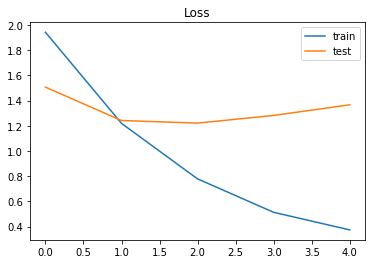

In [84]:
# visualising the loss between train and test
plt.title('Loss')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

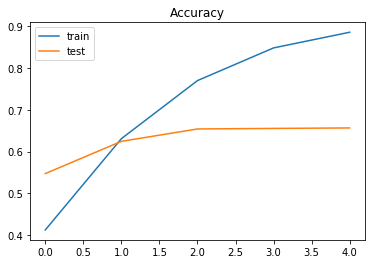

In [85]:
# visualising the accuracy between train and test
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [86]:
# testing with a new title

new_title = ['colour blind colourblind test']
seq = tokenizer.texts_to_sequences(new_title)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Entertainment', 'People & Blogs', 'News & Politics','Music','Sports','Comedy','Film & Animation', 'Howto & Style','Gaming',
          'Education','Science & Technology','Pets & Animals','Autos & Vehicles','Nonprofits & Activism','Travel & Events','Shows']
print(pred, labels[np.argmax(pred)])

[[2.2077283e-03 2.0432107e-02 2.8279501e-01 1.4557472e-01 3.7014387e-03
  2.6378371e-03 4.9198989e-02 3.2161999e-05 3.0017860e-04 1.5001897e-02
  4.3743863e-03 3.9585270e-02 2.3509755e-03 4.2548648e-01 3.6531645e-03
  2.0332592e-04 2.4643897e-03]] Nonprofits & Activism


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(country_final['title'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [88]:
X = tfidf.transform(country_final['title'])
country_final['title'][1]

'tl dw every dceu movie justice league'

In [89]:
print ([X[1, tfidf.vocabulary_['movie']]])

[0.2511867949716173]


In [90]:
print ([X[1, tfidf.vocabulary_['justice']]])

[0.3204543266330656]


In [91]:
print ([X[1, tfidf.vocabulary_['league']]])

[0.3053933091905269]


In [67]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_summary = dict()
for readme in readmes:
    sentences = nltk.tokenize.sent_tokenize(readme)
    for sentence in sentences:
        sentiment_score = sid.polarity_scores(sentence)
        if sentiment_score["compound"] == 0.0:
            sentiment_summary["neutral"] += 1
        elif sentiment_score["compound"] > 0.0:
            sentiment_summary["positive"] += 1
        else:
            sentiment_summary["negative"] += 1

NameError: name 'readmes' is not defined

In [ ]:
# tf-idf gives highest weight to 'justice' as it is a much rarer word than 'movie' or 'league' and thus indicates its relative importance in a corpus of words from the titles

In [94]:
# # sentiment classification

# country_final['Positivity'] = np.where(country_final['like_percentage'] > 85)
# cols = ['channel_title', 'tags', 'description', 'category_id', 'category', 'region', 'trending_days', 'likes', 'dislikes', 'views']

# country_final.drop(cols, axis=1, inplace=True)
# country_final.head()